<a href="https://colab.research.google.com/github/atanasvasilevjourney/Data/blob/master/Credit%20Risk%20Stata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create API Token from Kaggle and Upload json file


In [18]:
import os
import shutil

# Create the Kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json into the directory
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set permissions to secure the file
os.chmod("/root/.kaggle/kaggle.json", 600)


In [11]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"nastadata","key":"9d6ae17893b37f31ce6ae58edf56c181"}'}

In [12]:
import os
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi

Access the dataset and download it from Kaggle through API\\

In [13]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [19]:
!kaggle datasets download -d ranadeep/credit-risk-dataset


Dataset URL: https://www.kaggle.com/datasets/ranadeep/credit-risk-dataset
License(s): GPL-2.0


In [20]:
# Unzip the downloaded dataset
!unzip credit-risk-dataset.zip


Archive:  credit-risk-dataset.zip
  inflating: LCDataDictionary.xlsx   
  inflating: loan/loan.csv           


Read the csv file(dataset) from the unzipped file

In [27]:
df = pd.read_csv('loan/loan.csv')
df.head()

<ipython-input-27-cbd66aa4ce79>:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan/loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN
887378,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN


Exploratory Data Analysis Of Credit Risk Dataset

In [28]:
#data type of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [29]:
#structure of dataset
df.shape

(887379, 74)

In [36]:
#check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(missing_values, missing_percentage)

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            866007
total_rev_hi_lim     70276
inq_fi              866007
total_cu_tl         866007
inq_last_12m        866007
Length: 74, dtype: int64 id                   0.000000
member_id            0.000000
loan_amnt            0.000000
funded_amnt          0.000000
funded_amnt_inv      0.000000
                      ...    
all_util            97.591559
total_rev_hi_lim     7.919502
inq_fi              97.591559
total_cu_tl         97.591559
inq_last_12m        97.591559
Length: 74, dtype: float64


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive stats for key features against loan amount


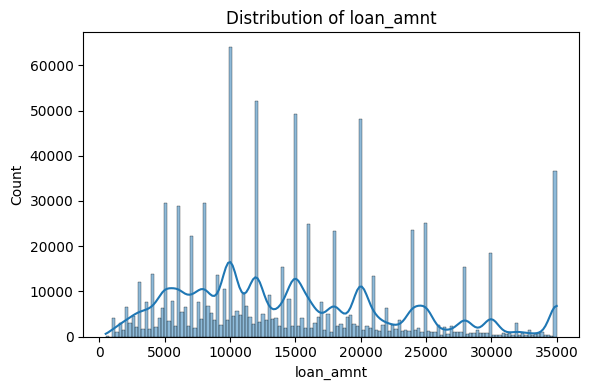

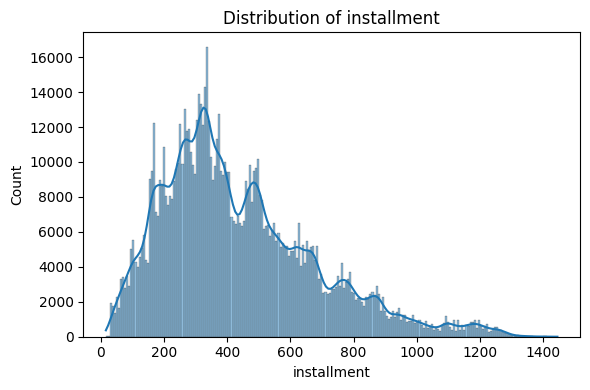

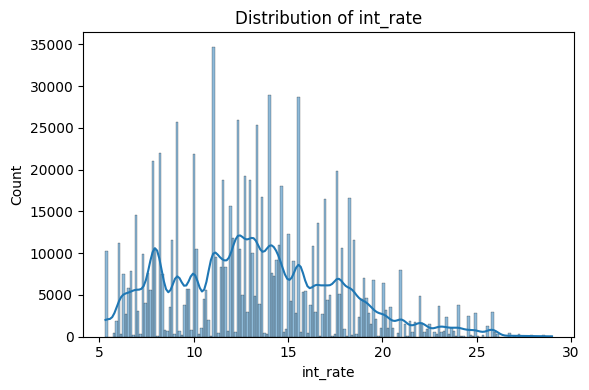

In [39]:

key_numerical = ['loan_amnt', 'installment', 'int_rate']
for col in key_numerical:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()

Hypothesis Testing  Does term affect interest rates
H0 -  The average interest rates for 36-month and 60-month loans are the same.
H1 - The average interest rates for 36-month and 60-month loans are different.


> Context Checking if applicants with different loan terms (36 months vs 60 months) have significantly different average interest rates.

Choosing the right statistical test in this context?
As we are testing Average interest rates, we are testing central measures, means, so we are using T-test

Preparing the data:

1. As we have a string values in col. Term - 36 months, 60 months, etc. We should extract the numeric values from a string to include in the test.
2. Cluster the groups for different terms of loan

In [41]:
#extract numbers of months from Col.'Term'
df['term_values'] = df['term'].str.extract('(\d+)').astype(float)
print(df['term_values'])

0         36.0
1         60.0
2         36.0
3         36.0
4         60.0
          ... 
887374    36.0
887375    36.0
887376    60.0
887377    60.0
887378    36.0
Name: term_values, Length: 887379, dtype: float64


In [45]:
#collect int rate and cluster them based on term value
group_36 = df[df['term_values'] == 36]['int_rate'].dropna()
group_60 = df[df['term_values'] == 60]['int_rate'].dropna()
print(group_36)

0         10.65
2         15.96
3         13.49
5          7.90
7         18.64
          ...  
887372    11.99
887373    15.59
887374    11.99
887375    11.99
887378    11.99
Name: int_rate, Length: 621125, dtype: float64


Perform T-test



*   A t-test is an inferential statistic used to determine if there is a
statistically significant difference between the means of two variables.

*   The t-test is a test used for hypothesis testing in statistics.


*   Calculating a t-test requires the difference between the mean values from each data set, the standard deviation of each group, and the number of data values

*   T-tests can be dependent or independent.




In [46]:
#performing

from scipy import stats
t_stat, p_val = stats.ttest_ind(group_36, group_60)

T-statistic: Magnitude indicates how far apart the means are.
P-value
alpha = 0.05

if p-value < 0.05 -> Reject H0 - Loan term affects interest rates
if p-value > 0.05 -> accept H0 -  no effect of loan term

In [50]:
print("T-statistic:", t_stat)
print("P-value:", p_val)
alpha = 0.05
if p_val < alpha:
    print("Reject H₀ → Loan term affects interest rate.")
else:
    print("Fail to reject H₀ → No significant effect.")

T-statistic: -446.17741169251684
P-value: 0.0
Reject H₀ → Loan term affects interest rate.


Conclusions:
T-statistics = -446.18 means significant difference between two categories
p-value = 0 confirms the common logic for long term loans has lower interest rateshypothesis
p-value < 0.05 we can reject null hypothesis.Accept the alternative
Long term loans affect the interest rates.

Hypothesis Testing 2

